## Importing packages

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [85]:
df = pd.read_csv('Mall_Customers.csv')

In [86]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


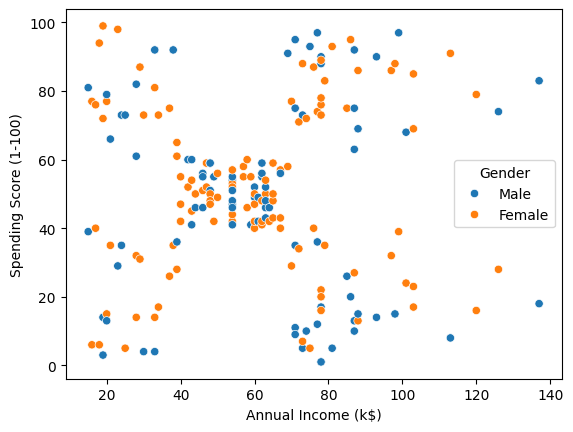

In [87]:
sns.scatterplot(data = df,x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,hue = 'Gender');

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [89]:
numeric_cols = ['Annual Income (k$)','Spending Score (1-100)','Gender','Age']

In [90]:
X = df[numeric_cols]

## Applying K-Means algorithm

In [91]:
le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])

In [92]:
X = df[['Gender_encoded', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [93]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


model = KMeans(n_clusters=2, random_state=42)
y_kmeans = model.fit_predict(X_scaled)

In [98]:
y_kmeans

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int32)

## Visualization after clustering
Orange represents female and Blue represents male

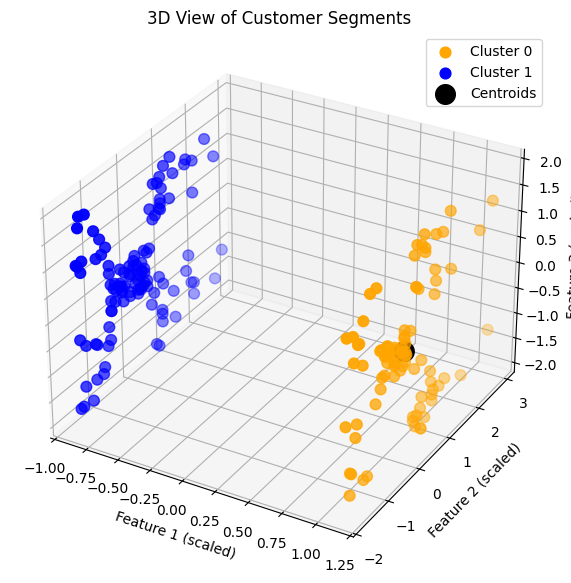

In [97]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

colors = ['orange', 'blue']

for i in range(2):  
    ax.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], X_scaled[y_kmeans == i, 2], 
               s=60, c=colors[i], label=f'Cluster {i}')


ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], model.cluster_centers_[:, 2],
           s=200, c='black', label='Centroids', marker='o')


ax.set_title('3D View of Customer Segments')
ax.set_xlabel('Feature 1 (scaled)')
ax.set_ylabel('Feature 2 (scaled)')
ax.set_zlabel('Feature 3 (scaled)')
ax.legend()
plt.show()
